# Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

## Importing Libraries And Datasets


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pwd

'/Users/robsalter/Desktop/Dataquest/Step 2 Intermediate Python and Pandas/Guided Project - Clean And Analyze Employee Exit Surveys'

In [5]:
dete_survey = pd.read_csv('/Users/robsalter/Desktop/Dataquest/Step 2 Intermediate Python and Pandas/Guided Project - Clean And Analyze Employee Exit Surveys/dete_survey.csv', na_values = 'Not Stated')
#Rows with not stated were not treated as na values, so we have set not stated as an na value when reading in the file.
tafe_survey = pd.read_csv('/Users/robsalter/Desktop/Dataquest/Step 2 Intermediate Python and Pandas/Guided Project - Clean And Analyze Employee Exit Surveys/tafe_survey.csv')
pd.set_option('max_columns', 180)
pd.set_option('max_rows',180)

## Exploring The Surveys

### Dete_survey

In [6]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [7]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Relevant columns: Id, SeparationType, Cease Date, DETE Start Date, Role Start Date, Position, Region, Employment Status, job dissatisfaction and reasons, age, gender.

In [8]:
dete_survey['Cease Date'].value_counts(dropna=False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
04/2013      2
08/2012      2
02/2014      2
07/2014      2
09/2014      1
2010         1
2014         1
09/2010      1
07/2012      1
11/2012      1
07/2006      1
Name: Cease Date, dtype: int64

In [9]:
dete_survey['DETE Start Date'].value_counts(dropna=False)

NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
1975.0    21
2013.0    21
2005.0    20
1990.0    20
1999.0    19
1996.0    19
1992.0    18
1991.0    18
2000.0    18
2004.0    18
1989.0    17
1978.0    15
2003.0    15
1988.0    15
1976.0    15
2002.0    15
1974.0    14
1997.0    14
1998.0    14
1979.0    14
1995.0    14
1980.0    14
1993.0    13
1972.0    12
1986.0    12
1977.0    11
1971.0    10
1984.0    10
1994.0    10
1969.0    10
2001.0    10
1983.0     9
1981.0     9
1973.0     8
1985.0     8
1987.0     7
1982.0     4
1963.0     4
1968.0     3
1967.0     2
1965.0     1
1966.0     1
Name: DETE Start Date, dtype: int64

Dates should be formatted by year and not by month

In [10]:
dete_survey['Age'].value_counts(dropna=False).sort_index()

20 or younger      1
21-25             40
26-30             57
31-35             39
36-40             51
41-45             61
46-50             63
51-55            103
56-60            174
61 or older      222
NaN               11
Name: Age, dtype: int64

In [11]:
# Identifying incomplete columns
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

Initial investigation shows that whilst some rows are incomplete, for the rows that we are interested in, we have an almost complete dataset. Relevant columns required to answer our questions include:

Id, SeparationType, Cease Date, DETE Start Date, Role Start Date, Position, Region, Employment Status, job dissatisfaction and reasons, age, gender.

Initial analysis of the dates shows that we want to format the columns by year. The cease date column a mixture of year and month whilst the start date column is by year.

The job dissatisfaction and reasons for this have been entered as a true/false answer which will allow us to treat them as a boolean.

Finally, the age column includes 11 na values which require further investigation. The ages are grouped into bins which will allow analysis using a histogram.

### Tafe Survey

In [12]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [13]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [14]:
tafe_survey['CESSATION YEAR'].value_counts(dropna=False)

2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: CESSATION YEAR, dtype: int64

In [15]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [16]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [17]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False).sort_index()

1-2                   102
11-20                  89
3-4                    96
5-6                    48
7-10                   43
Less than 1 year      147
More than 20 years     71
NaN                   106
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [18]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Initial findings are that this dataset includes a larger number of columns with incomplete information as well as columns that will require reformatting. Relevant column headings will need editing so they are easier to work with.

The following columns are relevant to answering our questions: CESSATION YEAR, reason for ceasing employment, contributing factors (incomplete data), main factor for leaving, gender, CurrentAge, Employment type, LengthofServiceOverall, LengthofServiceCurrent

Columns in need of reformatting are the cessation year and the length of service overall in order for them to suit our requirements.

From our work in the previous screen, we can first make the following observations:

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.

## Dropping Columns From Each Dataset That Are Not Required

We will use the dataframe.drop() method to remove columns 28-49 from the Dete survey and columns 17-66 from the Tafe survey. 



In [19]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
dete_survey_updated.shape


(822, 35)

In [20]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)
tafe_survey_updated.shape

(702, 23)

## Editing Column Names

Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names using DataFrame.Columns + vectorized string methods.

1. Rename the remaining columns in the dete_survey_updated dataframe.

    Use the following criteria to update the column names:
        - Make all the capitalization lowercase.
        - Remove any trailing whitespace from the end of the strings.
        - Replace spaces with underscores ('_').



In [21]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [22]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


2. Use the DataFrame.rename() method to update the columns below in tafe_survey_updated. Don't worry about the rest of the column names right now - we'll handle them later.

        - 'Record ID': 'id'
        - 'CESSATION YEAR': 'cease_date'
        - 'Reason for ceasing employment': 'separationtype'
        - 'Gender. What is your Gender?': 'gender'
        - 'CurrentAge. Current Age': 'age'
        - 'Employment Type. Employment Type': 'employment_status'
        - 'Classification. Classification': 'position'
        - 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
        - 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'


In [23]:
tafe_survey_updated = tafe_survey_updated.rename(columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Removing Unnecessary Data - Filtering By Seperationtype - Resignation

Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [24]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [25]:
pattern = r"Resignation"
dete_resig_bool = dete_survey_updated['separationtype'].str.contains(pattern, na=False)
dete_resignations_filter = dete_survey_updated[dete_resig_bool]
dete_resignations = dete_resignations_filter.copy()
dete_resignations['separationtype'].value_counts(dropna=False)


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [26]:
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [27]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verifying The Data Doesn't Include Inconsistencies

Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

It may not always be possible to catch all of these errors, but by making sure the data seems reasonable to the best of our knowledge, we can stop ourselves from completing a data analysis project that winds up being useless because of bad data.

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. However, we encourage you to check the data for other issues as well!

  - Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
  - Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.


In [28]:
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [29]:
# Getting the year. first number is between 1 and 2 followed by 3 digits between 0 and 9.
pattern = r"([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype('float')
dete_resignations['cease_date'].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [30]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

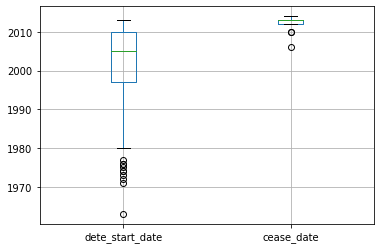

In [31]:
dete_resignations.boxplot(column = ['dete_start_date','cease_date'])

In [32]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

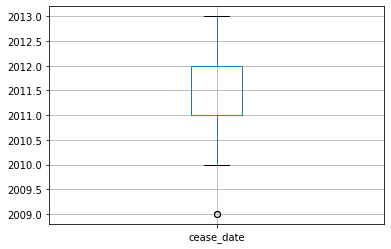

In [33]:
tafe_resignations.boxplot(column = 'cease_date')

From the work we did in the last screen, we can verify:

  - There aren't any major issues with the years.
  - The years in each dataframe don't span quite the same number of years. We have decided to maintain all the rows as these, including the outliers as they don't negative affect the dataset in regards to anwering our question.
  
    Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
    
## Creating A Corresponding 'institute_service' Column In dete_resignations

In [34]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
#check
dete_resignations['institute_service'].value_counts(dropna=False).head(5)

NaN    38
5.0    23
1.0    22
3.0    20
0.0    20
Name: institute_service, dtype: int64

We have created a corresponding institute service column in the dete_resignations dataset. This column is the length of service for each employ and will allow us to answer our question: 

 - Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
 
## Identifying Dissatisfied Employees 

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
       - Contributing Factors. Dissatisfaction
       - Contributing Factors. Job Dissatisfaction
2. detesurveyupdated:
       - job_dissatisfaction
       - dissatisfaction_with_the_department
       - physical_work_environment
       - lack_of_recognition
       - lack_of_job_security
       - work_location
       - employment_conditions
       - work_life_balance
       - workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [35]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [36]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [37]:
# a function that returns a boolean as to whether the employee was dissatisfied
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [38]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [39]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']].any(1,skipna=False)
dete_resignations_up = dete_resignations.copy()

We updateed the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values.

We did this by:
  - Writing a function named update_vals that makes the following changes:
      If the value is NaN, return np.nan.
      If the value is '-', return False.
      For any other value, return True.
  - Used the DataFrame.applymap() method to apply the function above to the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.
  - Used the df.any() method as described above to create a dissatisfied column in BOTH the tafe_resignations and dete_resignations dataframes.
  - Used the df.copy() method to create a copy of the results and avoid the SettingWithCopy Warning. Assign the results to dete_resignations_up and tafe_resignations_up.

## To recap, we've accomplished the following:

  - Renamed our columns
  - Dropped any data not needed for our analysis
  - Verified the quality of our data
  - Created a new institute_service column
  - Cleaned the Contributing Factors columns
   -Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

## Combining The Datasets

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

  - Add a column named institute to dete_resignations_up. Each row should contain the value DETE.
  - Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.


In [40]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True,sort=True)

combined_updated = combined.dropna(axis=1, thresh=500).copy()
combined_updated.shape

(651, 10)

We have combined the 2 datasets into 1 dataset called combined but there are still a number of columns in the dataset that are not required to complete our analysis. We have removed these columns using the dropna method and setting a threshold for NaN values at 500. This means that we have removed any columns that have less than 500 non null values. 

## Cleaning The Institute_service Column

This columns includes data in diffent forms which need to be cleaned to allow further analysis.

In [41]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


## Categorising The Years Of Service

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

  - New: Less than 3 years at a company
  - Experienced: 3-6 years at a company
  - Established: 7-10 years at a company
  - Veteran: 11 or more years at a company
  
We have used the following method:

  - Extracted the years of service frrom the institute_service column using vectorized string method.
  - Converted back to a string
  - Created a function that maps each year into a career stage.
  - Applied this to the institute_service column and created a new column called 'service_cat'.


In [42]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r"(\d+)")
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
print(combined_updated['institute_service_up'].value_counts(dropna=False).sum())
print(combined_updated['institute_service'].value_counts(dropna=False).sum())


651
651


In [43]:
def career_stage(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [44]:
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Initial Analysis

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value=False)

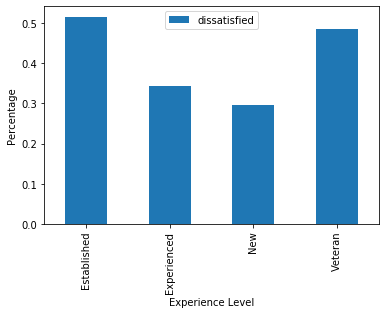

In [47]:
dissat_emp = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

dissat_emp.plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Percentage')
plt.show()

Our initial analysis finds that employees who havee been in their position more than 7 years are likely to resign due to some kind of dissatisfaction. Further analysis is required to find the reasons behind these figures, but this gives us a starting point from which to continue our analysis.

## Conclusion

In this guided project, we experienced that in order to extract any meaningful insights from our data, we had to perform many data cleaning tasks. In order to create one visualization (and not even the final one), we completed the following tasks:
    
  - Explored the data and figured out how to prepare it for analysis
  - Corrected some of the missing value
  - Dropped any data not needed for our analysis
  - Renamed our column
  - Verified the quality of our data
  - Created a new institute_service colum
  - Cleaned the Contributing Factors columns
  - Created a new column indicating if an employee resigned because they were dissatisfied in some way
  - Combined the data
  - Cleaned the institute_service column
  - Handled the missing values in the dissatisfied column
  - Aggregated the data
